In [16]:
import cPickle as pkl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
descriptor = '_constant_tRNAs'

In [3]:
dft = pkl.load(open('../../results/dft' + descriptor + '.p', 'r'))

In [4]:
dft.head(n=10)

,ribosomes,transcripts,index,geneID,init_rate,length,tic_toc
0,1000,28808,0,YBR177C,0.000002,1356,77.60
1,1000,28808,1,YBR177C,0.000002,1356,NaN
2,1000,28808,2,YBR177C,0.000002,1356,NaN
3,1000,28808,3,YBR177C,0.000002,1356,69.05
4,1000,28808,4,YIL140W,0.000002,2472,NaN
5,1000,28808,5,YIL140W,0.000002,2472,122.10
6,1000,28808,6,YLR268W,0.000002,645,42.80
7,1000,28808,7,YLR268W,0.000002,645,34.75
8,1000,28808,8,YLR268W,0.000002,645,NaN
9,1000,28808,9,YLR268W,0.000002,645,NaN


In [5]:
dftnotnan = dft[dft.tic_toc.notnull()]
del dftnotnan['index']

In [6]:
dftnotnan.head(n=10)

,ribosomes,transcripts,geneID,init_rate,length,tic_toc
0,1000,28808,YBR177C,1.644214e-06,1356,77.600
3,1000,28808,YBR177C,1.644214e-06,1356,69.050
5,1000,28808,YIL140W,1.649229e-06,2472,122.100
6,1000,28808,YLR268W,1.844285e-06,645,42.800
7,1000,28808,YLR268W,1.844285e-06,645,34.750
11,1000,28808,YOR011W,2.686820e-07,4185,209.050
12,1000,28808,YPL043W,2.096261e-06,2058,90.675
14,1000,28808,YPL043W,2.096261e-06,2058,84.500
17,1000,28808,YJL155C,1.490352e-06,1359,72.050
20,1000,28808,YHR067W,6.017500e-07,843,41.250


Calculate mean tic_tocs:

In [7]:
dft_grouped = dftnotnan.groupby(['geneID', 'init_rate', 'length', 'ribosomes', 'transcripts'], as_index=False).mean()

Calculate ribosome speeds:

In [8]:
dft_grouped['ribosome_speed'] = dft_grouped.length / dft_grouped.tic_toc / 3.

In [9]:
dft_grouped.head(n=20)

,geneID,init_rate,length,ribosomes,transcripts,tic_toc,ribosome_speed
0,YAL001C,7.602266e-07,3483,1000,28808,200.550000,5.789080
1,YAL001C,7.602266e-07,3483,1000,57558,189.700000,6.120190
2,YAL001C,7.602266e-07,3483,2000,28808,192.400000,6.034304
3,YAL001C,7.602266e-07,3483,2000,57558,193.550000,5.998450
4,YAL001C,7.602266e-07,3483,5000,28808,191.550000,6.061081
5,YAL001C,7.602266e-07,3483,5000,57558,200.025000,5.804274
6,YAL001C,7.602266e-07,3483,10000,28808,186.325000,6.231048
7,YAL001C,7.602266e-07,3483,10000,57558,186.883333,6.212432
8,YAL001C,7.602266e-07,3483,20000,28808,185.712500,6.251599
9,YAL001C,7.602266e-07,3483,20000,57558,184.993750,6.275888


Next step: produce series by number of ribosomes.

We want to only include genes for which we have all 9 ribosome counts in the table.

In [10]:
gene_count_28808 = pd.DataFrame(dft_grouped[dft_grouped.transcripts==28808]['geneID'].value_counts())
gene_count_28808 = gene_count_28808[gene_count_28808['geneID']==9]
gene_count_28808.columns =  ['data_count']
len(gene_count_28808)

1955

In [11]:
gene_count_57558 = pd.DataFrame(dft_grouped[dft_grouped.transcripts==57558]['geneID'].value_counts())
gene_count_57558 = gene_count_57558[gene_count_57558['geneID']==9]
gene_count_57558.columns =  ['data_count']
len(gene_count_57558)

2289

In [12]:
dft_selected_28808 = pd.merge(gene_count_28808, dft_grouped[dft_grouped.transcripts==28808], left_index = True, right_on='geneID')
dft_selected_57558 = pd.merge(gene_count_57558, dft_grouped[dft_grouped.transcripts==57558], left_index = True, right_on='geneID')

In [13]:
dft_selected_28808.head(n=19)

,data_count,geneID,init_rate,length,ribosomes,transcripts,tic_toc,ribosome_speed
4409,9,YBR177C,0.000002,1356,1000,28808,73.325000,6.164337
4411,9,YBR177C,0.000002,1356,2000,28808,66.733333,6.773227
4413,9,YBR177C,0.000002,1356,5000,28808,73.125000,6.181197
4415,9,YBR177C,0.000002,1356,10000,28808,69.177500,6.533916
4417,9,YBR177C,0.000002,1356,20000,28808,64.883259,6.966358
4419,9,YBR177C,0.000002,1356,50000,28808,62.322917,7.252549
4421,9,YBR177C,0.000002,1356,100000,28808,57.814844,7.818061
4423,9,YBR177C,0.000002,1356,200000,28808,51.245692,8.820254
4425,9,YBR177C,0.000002,1356,500000,28808,47.439674,9.527890
43162,9,YLL023C,0.000002,840,1000,28808,40.925000,6.841784


In [23]:
ribosomes = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]

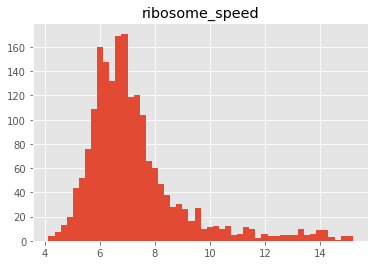

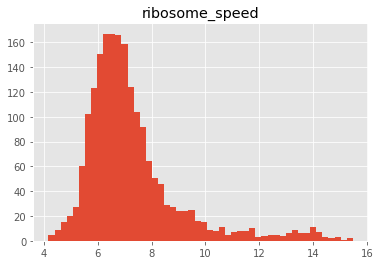

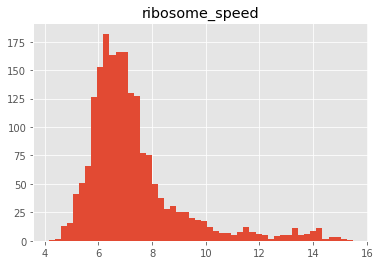

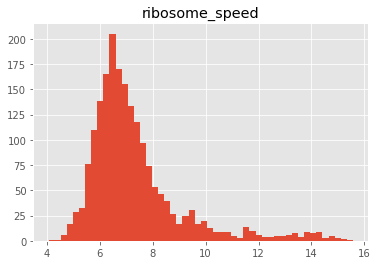

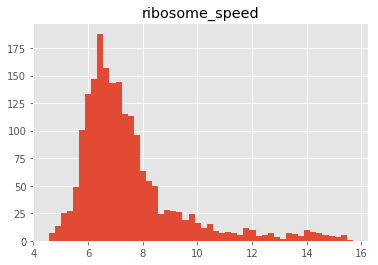

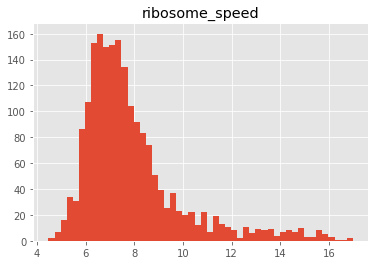

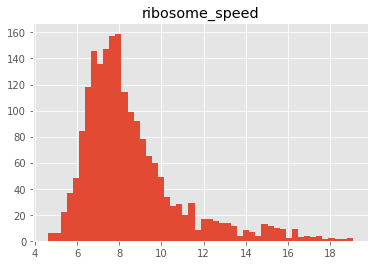

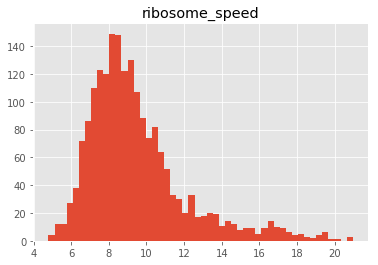

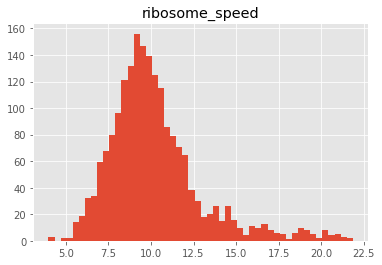

In [24]:
for ribos in ribosomes:
    dft_selected_28808[dft_selected_28808.ribosomes==ribos].hist(column='ribosome_speed', bins=50)

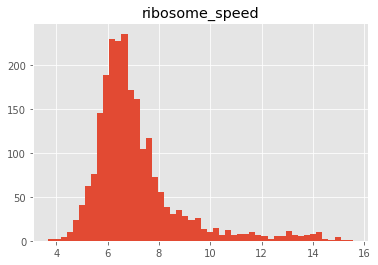

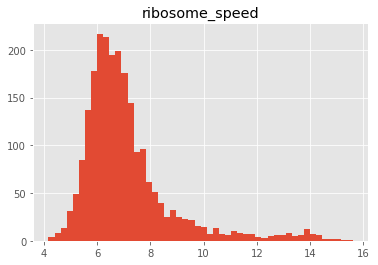

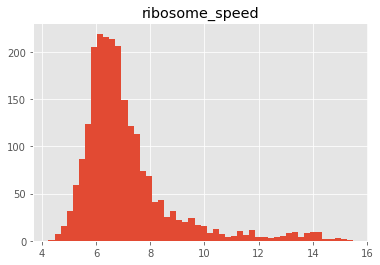

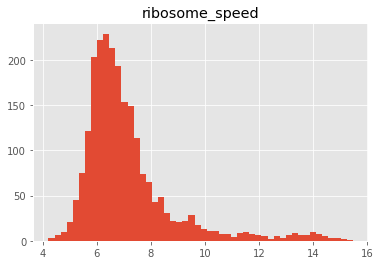

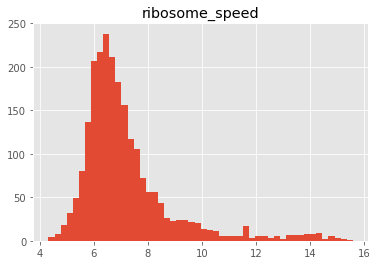

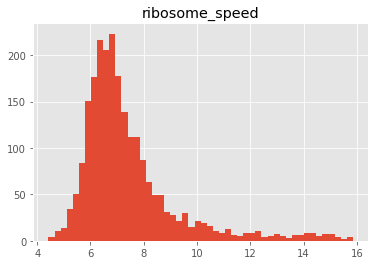

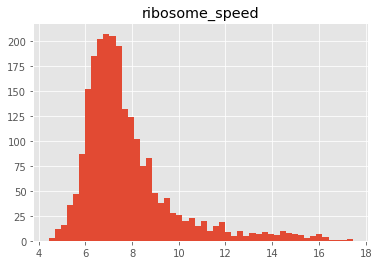

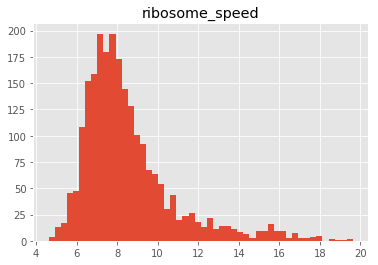

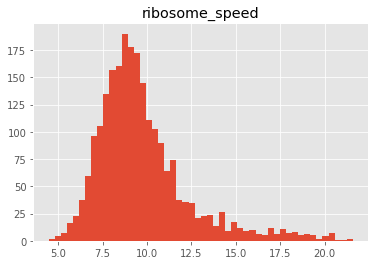

In [25]:
for ribos in ribosomes:
    dft_selected_57558[dft_selected_57558.ribosomes==ribos].hist(column='ribosome_speed', bins=50)

Looks interesting. Check the statistics:

In [31]:
for ribos in ribosomes:
    print
    print ribos
    print dft_selected_28808[dft_selected_28808.ribosomes==ribos][['tic_toc', 'ribosome_speed']].describe()


1000
           tic_toc  ribosome_speed
count  1955.000000     1955.000000
mean     61.879301        7.262500
std      45.706128        1.819670
min       3.185074        4.130719
25%      30.625000        6.128842
50%      50.600000        6.851312
75%      78.491667        7.726776
max     402.916667       15.187673

2000
           tic_toc  ribosome_speed
count  1955.000000     1955.000000
mean     61.753434        7.263456
std      45.484302        1.805149
min       3.250280        4.162896
25%      30.650000        6.159603
50%      50.200000        6.826725
75%      78.286219        7.721965
max     408.837500       15.473741

5000
           tic_toc  ribosome_speed
count  1955.000000     1955.000000
mean     61.395202        7.296336
std      45.064372        1.808374
min       3.163245        4.140297
25%      30.640030        6.201830
50%      49.625000        6.860210
75%      77.490278        7.712965
max     384.950000       15.482458

10000
           tic_toc  ribosome_s

In [32]:
for ribos in ribosomes:
    print
    print ribos
    print dft_selected_57558[dft_selected_57558.ribosomes==ribos][['tic_toc', 'ribosome_speed']].describe()


1000
           tic_toc  ribosome_speed
count  2289.000000     2289.000000
mean     64.611363        7.095072
std      46.694224        1.736521
min       3.195160        3.693878
25%      33.600000        6.088254
50%      53.016667        6.666667
75%      80.250000        7.538036
max     390.200000       15.555205

2000
           tic_toc  ribosome_speed
count  2289.000000     2289.000000
mean     64.487230        7.107369
std      46.735224        1.723264
min       3.315842        4.166485
25%      32.968750        6.073030
50%      52.515278        6.696645
75%      80.900000        7.540026
max     399.892857       15.608735

5000
           tic_toc  ribosome_speed
count  2289.000000     2289.000000
mean     64.323059        7.108690
std      46.472272        1.717415
min       2.566667        4.240688
25%      33.092500        6.088795
50%      52.264881        6.658260
75%      80.675000        7.489501
max     390.470000       15.476380

10000
           tic_toc  ribosome_s